In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Exploratory Data Analysis (EDA)**

In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       752 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                         16
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [ ]:
print("Percetage of missing values: ", df['BMI'].isnull().sum()/df['BMI'].count() * 100, "%")

Percetage of missing values:  2.127659574468085 %


In [ ]:
mean_BMI = df['BMI'].mean()
df['BMI'].fillna(mean_BMI, inplace=True)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
print(f"Usia paling muda : {df['Age'].min()}")
print(f"Usia paling tua  : {df['Age'].max()}")

Usia paling muda : 21
Usia paling tua  : 81


In [ ]:
diabetes_counts = df['Outcome'].value_counts()
diabetes_counts

0    500
1    268
Name: Outcome, dtype: int64

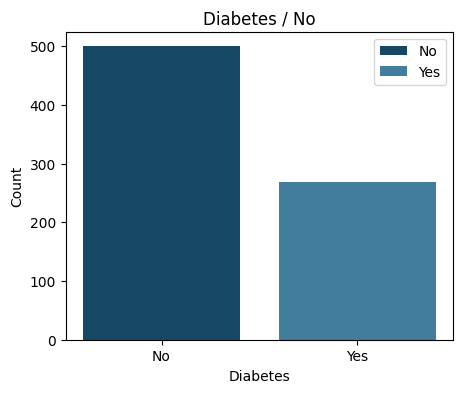

In [ ]:
plt.figure(figsize=(5, 4))
colors = ['#164863', '#427D9D']

bars = plt.bar(diabetes_counts.index, diabetes_counts.values, color=colors)

plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Diabetes / No')
plt.xticks(diabetes_counts.index, ['No', 'Yes'])
plt.legend(bars, ['No', 'Yes'], loc='upper right')
plt.show()

In [ ]:
y = df['Outcome']
x = df.drop('Outcome', axis=1)

oversampler = RandomOverSampler(sampling_strategy='minority')
xOver, yOver = oversampler.fit_resample(x, y)

df = pd.concat([xOver, yOver], axis=1)
print(df['Outcome'].value_counts())

1    500
0    500
Name: Outcome, dtype: int64


In [ ]:
diabetes_counts = df['Outcome'].value_counts()

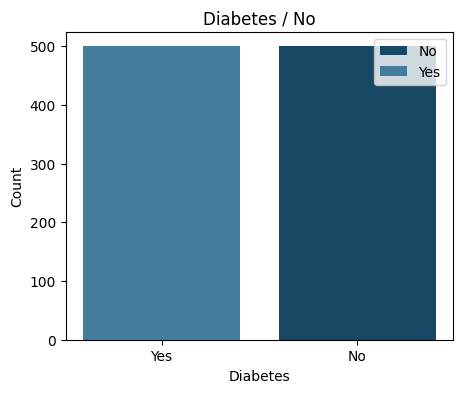

In [ ]:
plt.figure(figsize=(5, 4))
colors = ['#164863', '#427D9D']

bars = plt.bar(diabetes_counts.index, diabetes_counts.values, color=colors)

plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Diabetes / No')
plt.xticks(diabetes_counts.index, ['No', 'Yes'])
plt.legend(bars, ['No', 'Yes'], loc='upper right')
plt.show()

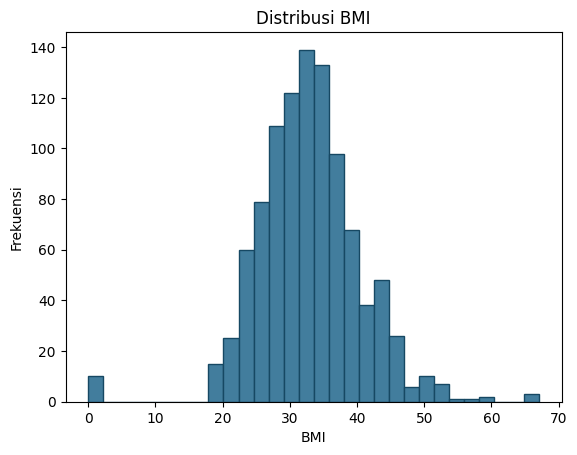

In [ ]:
plt.hist(df["BMI"], bins=30, color='#427D9D', edgecolor='#164863')
plt.title("Distribusi BMI")
plt.xlabel("BMI")
plt.ylabel("Frekuensi")
plt.show()

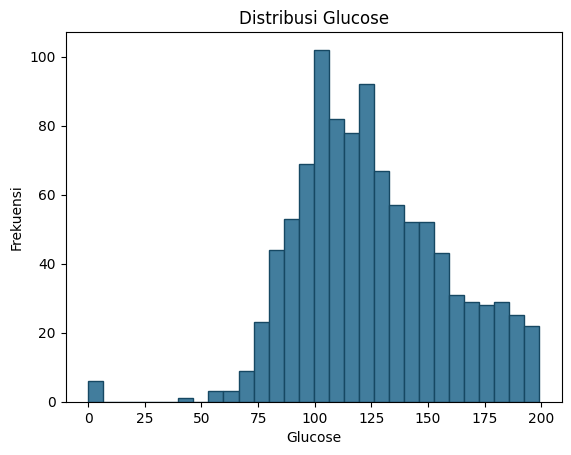

In [ ]:
plt.hist(df["Glucose"], bins=30, color='#427D9D', edgecolor='#164863')
plt.title("Distribusi Glucose")
plt.xlabel("Glucose")
plt.ylabel("Frekuensi")
plt.show()

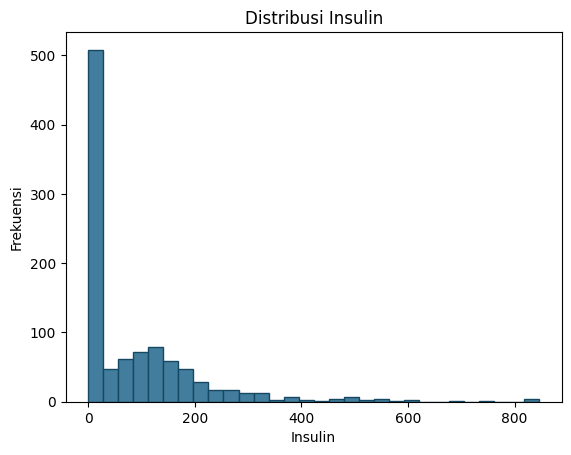

In [ ]:
plt.hist(df["Insulin"], bins=30, color='#427D9D', edgecolor='#164863')
plt.title("Distribusi Insulin")
plt.xlabel("Insulin")
plt.ylabel("Frekuensi")
plt.show()

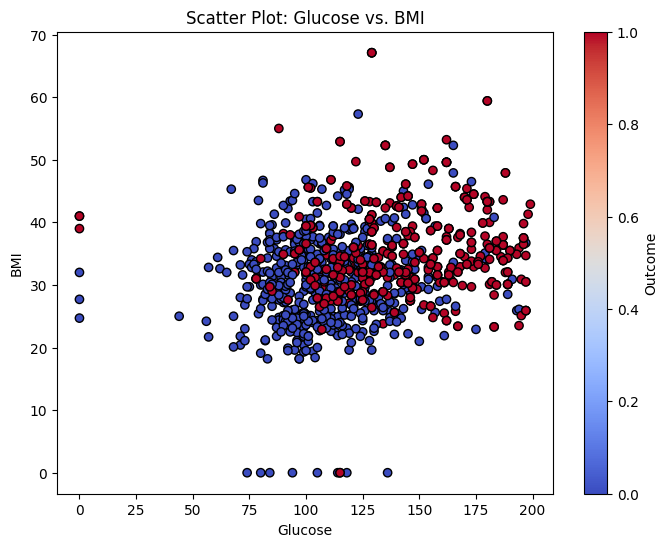

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Glucose'], df['BMI'], c=df['Outcome'], cmap='coolwarm', edgecolor='k')
plt.title('Scatter Plot: Glucose vs. BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.colorbar(label='Outcome')
plt.show()

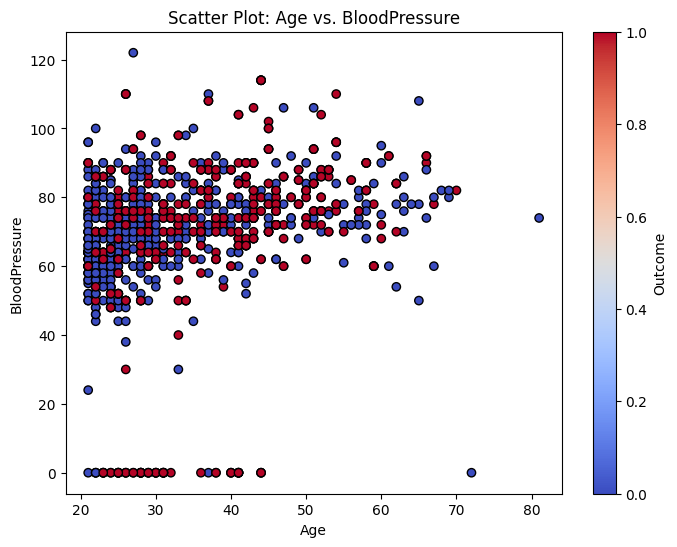

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['BloodPressure'], c=df['Outcome'], cmap='coolwarm', edgecolor='k')
plt.title('Scatter Plot: Age vs. BloodPressure')
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.colorbar(label='Outcome')
plt.show()

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.105628,0.157549,-0.057544,-0.062178,0.010779,-0.013678,0.531538,0.219915
Glucose,0.105628,1.000000,0.107317,0.032004,0.322887,0.233092,0.135538,0.248386,0.465286
BloodPressure,0.157549,0.107317,1.000000,0.229819,0.091322,0.246565,0.050180,0.246053,0.047670
SkinThickness,-0.057544,0.032004,0.229819,1.000000,0.424811,0.351690,0.185606,-0.091600,0.062943
Insulin,-0.062178,0.322887,0.091322,0.424811,1.000000,0.120405,0.139755,0.029334,0.124105
BMI,0.010779,0.233092,0.246565,0.351690,0.120405,1.000000,0.116683,0.020557,0.318035
DiabetesPedigreeFunction,-0.013678,0.135538,0.050180,0.185606,0.139755,0.116683,1.000000,0.044442,0.167874
Age,0.531538,0.248386,0.246053,-0.091600,0.029334,0.020557,0.044442,1.000000,0.251590
Outcome,0.219915,0.465286,0.047670,0.062943,0.124105,0.318035,0.167874,0.251590,1.000000


In [ ]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)

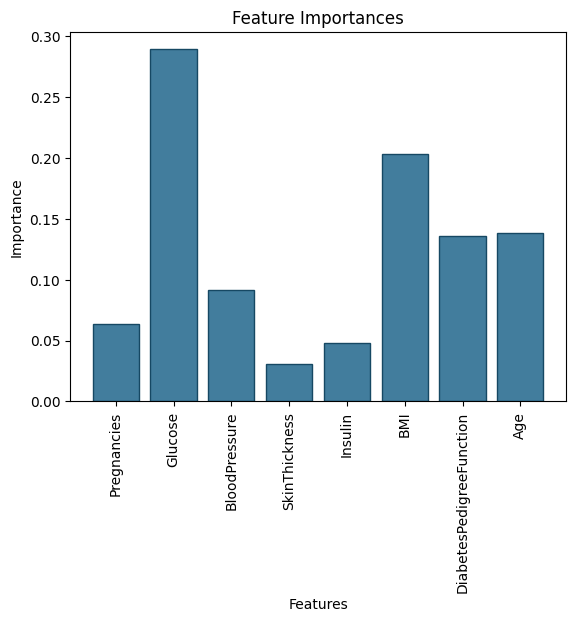

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X, y)
feature_importances = clf.feature_importances_

plt.bar(X.columns, feature_importances, color='#427D9D', edgecolor='#164863')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

## **1) Classification**
Target = `Outcome`

In [ ]:
X = df.drop(['Outcome', 'Pregnancies', 'SkinThickness', 'Insulin', 'BloodPressure'], axis=1)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Decision Tree**

In [ ]:
model_DT = DecisionTreeClassifier(random_state=0)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_predDT = model_DT.predict(X_test)
print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       105
           1       0.78      0.91      0.84        95

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.84      0.83      0.83       200



### **Logistic Regression**

In [ ]:
model_LT = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=0)
model_LT.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [ ]:
y_predLT = model_LT.predict(X_test)
print(classification_report(y_test, y_predLT))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       105
           1       0.76      0.82      0.79        95

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.80       200



### **KNN**

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predKNN = model_KNN.predict(X_test)
print(classification_report(y_test, y_predKNN))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       105
           1       0.68      0.77      0.72        95

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.71      0.71       200



### **Naive Baiyes**

In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_predNB = model_NB.predict(X_test)
print(classification_report(y_test, y_predNB))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.79      0.77      0.78        95

    accuracy                           0.80       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.80      0.79       200



## **2) Regression**
Target = `DiabetesPedigreeeFunction`

In [ ]:
X = df.drop('DiabetesPedigreeFunction', axis=1)
y = df['DiabetesPedigreeFunction']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Decision Tree**

In [ ]:
DT_model = DecisionTreeRegressor(random_state=0)
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred_dt = DT_model.predict(X_test)

MSE_DT = mean_squared_error(y_test, y_pred_dt)
print(f"Mean Squared Error (Decision Tree): {MSE_DT}")

Mean Squared Error (Decision Tree): 0.13371916


### **KNN**

In [ ]:
KNN_model = KNeighborsRegressor(n_neighbors=3)
KNN_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_pred_knn = KNN_model.predict(X_test)

MSE_KNN = mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error (KNN): {MSE_KNN}")

Mean Squared Error (KNN): 0.08476422722222222


### **Linear Regression**

In [ ]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr = LR_model.predict(X_test)

MSE_LR = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error (Linear Regression): {MSE_LR}")

Mean Squared Error (Linear Regression): 0.08011805589017044
